In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# --- Step 1: Load the dataset ---
df = pd.read_csv('glass.csv')
X = df.drop('Type', axis=1).values
y = df['Type'].values

In [3]:
# --- Step 2: Normalize the data ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# --- Step 3: Split into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# --- Step 4: Plot accuracy vs different values of K ---
accuracies = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

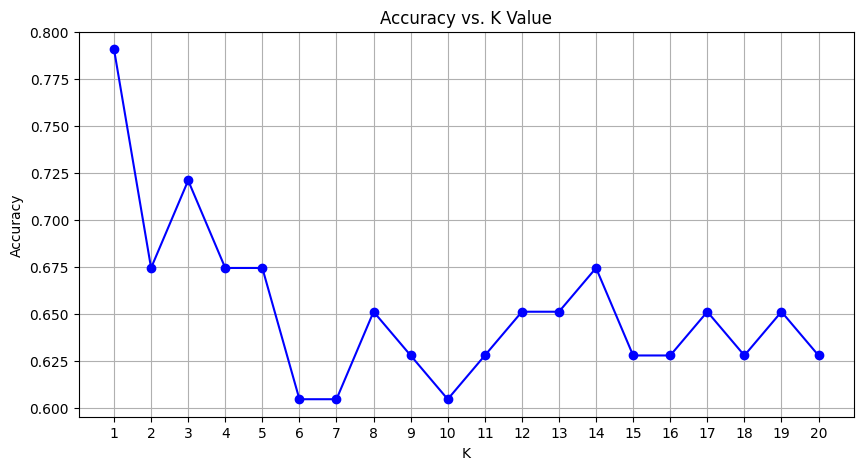

In [6]:
# --- Step 5: Plotting the graph ---
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [7]:
# --- Step 6: Get best K and re-train ---
best_k = np.argmax(accuracies) + 1
print(f"Best K found: {best_k} with accuracy: {accuracies[best_k - 1]:.4f}")


Best K found: 1 with accuracy: 0.7907


In [8]:
# --- Step 7: Train final model with best K ---
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
final_pred = final_knn.predict(X_test)

In [9]:
# --- Step 8: Evaluate final model ---
final_accuracy = accuracy_score(y_test, final_pred)
print(f"Final model accuracy with K={best_k}: {final_accuracy:.4f}")

Final model accuracy with K=1: 0.7907
